In [24]:
%autoreload 2

import healpy as hp
import numpy as np
from astropy.io import fits

import unwiseact as ua
import matplotlib.pyplot as plt
# Load the data
# table = ua.read_results('cibdBeta')
# print(table.keys())

Reading mask...


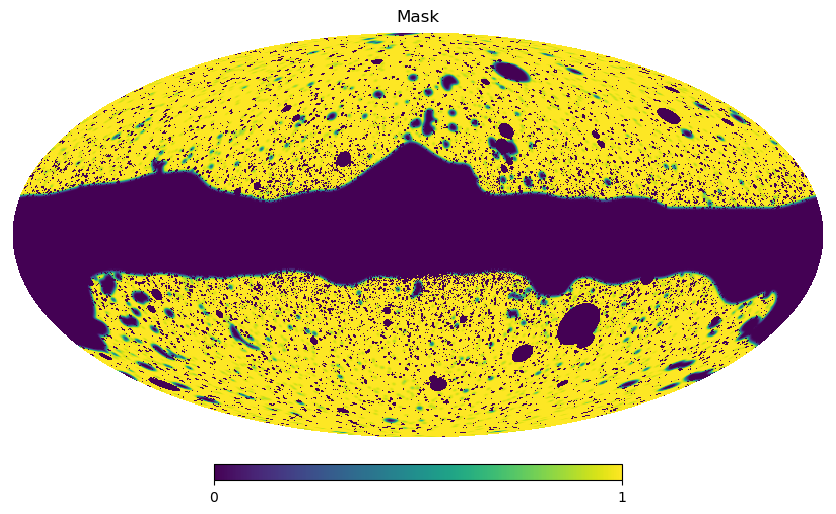

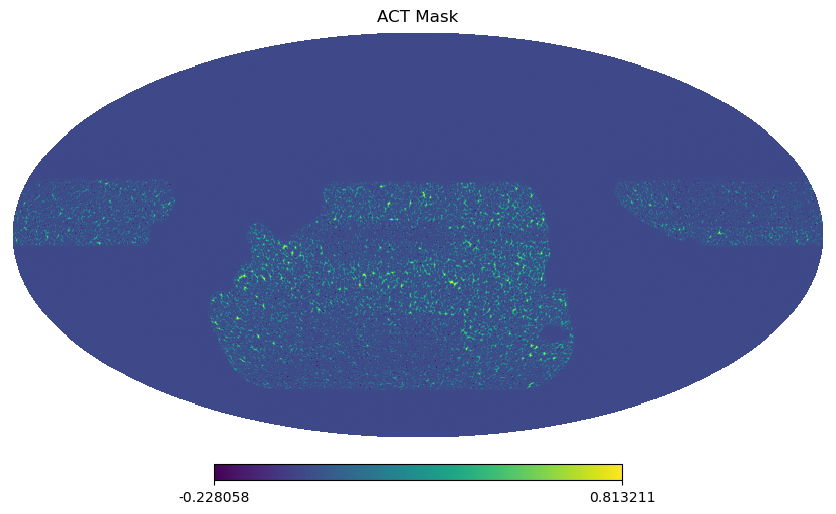

In [25]:
from assets import make_galaxy_map as mgm
from assets import deprojection_index as di

mask = mgm.readmask()
hp.mollview(mask, title='Mask')

mask_act = di.read_composite_mask()
hp.mollview(mask_act, title='ACT Mask')

In [12]:
OUTPATH = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/'

def read_results(path:str):
    # ignore the '#' in the header
    
    data = np.loadtxt(path,skiprows=1)
    header = open(path).readline().strip().split()
    header.remove('#')
    table = {header[i]:data[:,i] for i in range(len(header))}
    return table

In [15]:
table = read_results('/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/cibdBeta_results_first_sample.txt')
print(table.keys())

dict_keys(['ell', 'cibdBeta_1.0_T_10.7_gy', 'cibdBeta_1.0_T_10.7_yy', 'cibdBeta_1.2_T_10.7_gy', 'cibdBeta_1.2_T_10.7_yy'])


beta = 1.0 T = 10.7
beta = 1.2 T = 10.7


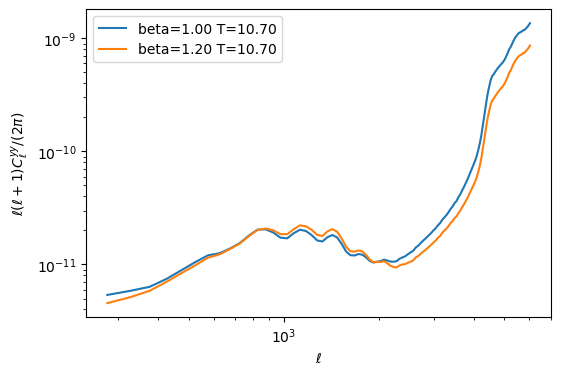

In [16]:
ell = table['ell']
pll = ell*(ell+1)/(2*np.pi) # Power spectrum normalization

def infer_params_from_string(s):
    parts = s.split('_')
    beta = float(parts[1])
    T = float(parts[3])
    return beta, T

plot_left = 5
plot_right = 1
fig,ax = plt.subplots(1,1, figsize=(6,4))
for models in table.keys():
    if models == 'ell':
        continue
    if '_gy' in models:
        continue   
    beta, T = infer_params_from_string(models)
    print('beta =', beta, 'T =', T)
    data = table[models]
    # hp.write_cl('cibdBeta_cl_beta{:.2f}_T{:.2f}.fits'.format(beta, T), data/pll)
    ax.plot(ell[plot_left:-plot_right], (data*pll)[plot_left:-plot_right], label='beta={:.2f} T={:.2f}'.format(beta, T))

# ax.plot(ell[plot_left:-plot_right], pll[plot_left:-plot_right]*np.mean(data), label='l(l+1)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^{yy}/(2\pi)$')
ax.legend()
plt.show()

beta = 1.0 T = 10.7
beta = 1.2 T = 10.7


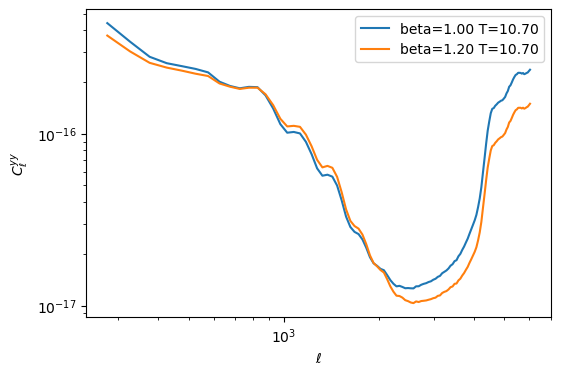

In [20]:
ell = table['ell']
pll = ell*(ell+1)/(2*np.pi) # Power spectrum normalization

def infer_params_from_string(s):
    parts = s.split('_')
    beta = float(parts[1])
    T = float(parts[3])
    return beta, T

plot_left = 5
plot_right = 1
fig,ax = plt.subplots(1,1, figsize=(6,4))
for models in table.keys():
    if models == 'ell':
        continue
    if '_gy' in models:
        continue   
    beta, T = infer_params_from_string(models)
    print('beta =', beta, 'T =', T)
    data = table[models]
    # hp.write_cl('cibdBeta_cl_beta{:.2f}_T{:.2f}.fits'.format(beta, T), data/pll)
    ax.plot(ell[plot_left:-plot_right], (data)[plot_left:-plot_right], label='beta={:.2f} T={:.2f}'.format(beta, T))

# ax.plot(ell[plot_left:-plot_right], pll[plot_left:-plot_right]*2e-16, label='l(l+1)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\ell^{yy}$')
ax.legend()
plt.show()

# CL_yy analysis

```NSIDE=2048```, lmax = 2*NSIDE+1 = 4097

The rerising of $C_l^{yy}$ is at around l = 3k is probably because over lmax capacity

beta = 1.0 T = 10.7
beta = 1.2 T = 10.7


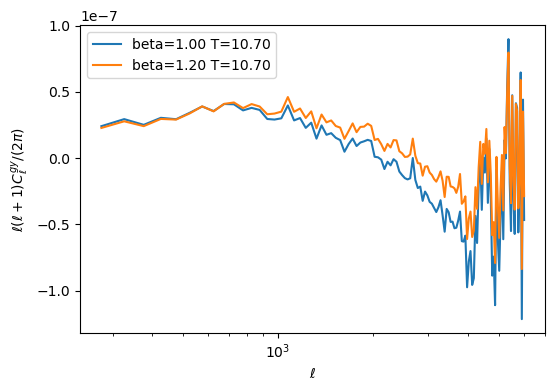

In [21]:
ell = table['ell']
pll = ell*(ell+1)/(2*np.pi) # Power spectrum normalization

def infer_params_from_string(s):
    parts = s.split('_')
    beta = float(parts[1])
    T = float(parts[3])
    return beta, T

plot_left = 5
plot_right = 1
fig,ax = plt.subplots(1,1, figsize=(6,4))
for models in table.keys():
    if models == 'ell':
        continue
    if '_yy' in models:
        continue   
    beta, T = infer_params_from_string(models)
    print('beta =', beta, 'T =', T)
    data = table[models]
    # hp.write_cl('cibdBeta_cl_beta{:.2f}_T{:.2f}.fits'.format(beta, T), data/pll)
    ax.plot(ell[plot_left:-plot_right], (data*pll)[plot_left:-plot_right], label='beta={:.2f} T={:.2f}'.format(beta, T))

# ax.plot(ell[plot_left:-plot_right], pll[plot_left:-plot_right]*np.mean(data), label='l(l+1)')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^{gy}/(2\pi)$')
ax.legend()
plt.show()

beta = 1.0 T = 10.7
beta = 1.2 T = 10.7


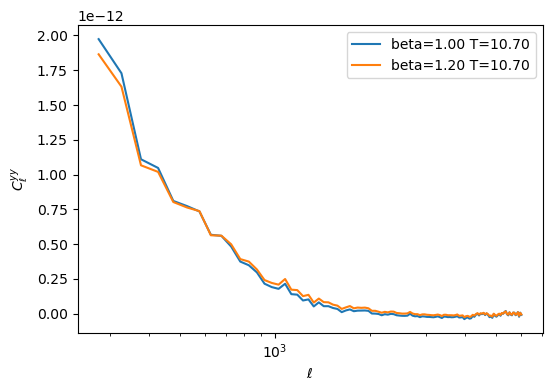

In [22]:
ell = table['ell']
pll = ell*(ell+1)/(2*np.pi) # Power spectrum normalization

def infer_params_from_string(s):
    parts = s.split('_')
    beta = float(parts[1])
    T = float(parts[3])
    return beta, T

plot_left = 5
plot_right = 1
fig,ax = plt.subplots(1,1, figsize=(6,4))
for models in table.keys():
    if models == 'ell':
        continue
    if '_yy' in models:
        continue   
    beta, T = infer_params_from_string(models)
    print('beta =', beta, 'T =', T)
    data = table[models]
    # hp.write_cl('cibdBeta_cl_beta{:.2f}_T{:.2f}.fits'.format(beta, T), data/pll)
    ax.plot(ell[plot_left:-plot_right], (data)[plot_left:-plot_right], label='beta={:.2f} T={:.2f}'.format(beta, T))

# ax.plot(ell[plot_left:-plot_right], pll[plot_left:-plot_right]*2e-16, label='l(l+1)')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\ell^{yy}$')
ax.legend()
plt.show()

## Cl_gy analysis

This analysis got only static. Something is wrong. The wrong thing is about the coordinate system of act sample.

By default the sample is in ra,dec, or celestial coordinates. we need to rotate to galactic coordinates.

In [44]:
from assets import deprojection_index as di
from assets import make_galaxy_map as mgm

unwise_map = mgm.makemap()
unwise_mask = mgm.read_compositemask()

Reading weights...
Reading mask...
Making galaxy map 1
Reading mask...


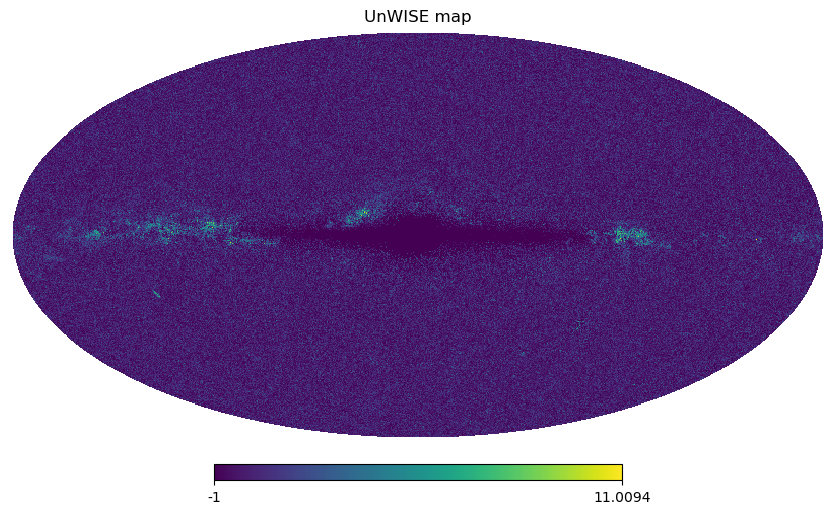

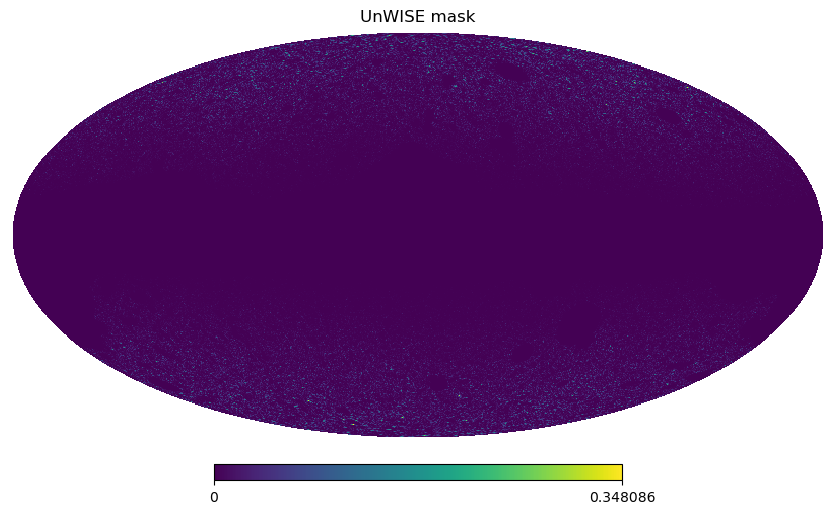

In [45]:
hp.mollview(unwise_map, title='UnWISE map')
hp.mollview(unwise_mask, title='UnWISE mask')

In [ ]:
PATHMAP = mgm.PATHMAP

print('Reading mask...')
mask = hp.read_map(PATHMAP+'mask/mask_unWISE_full_v10.fits')
lost = fits.open(PATHMAP+"loss/unmaskedareafrac-flag.fits")
mask_lost = lost[0].data
valid = (mask_lost !=0 ).astype(np.float64)

galmask = mask * valid

Reading mask...


In [49]:
valid_grade = hp.ud_grade(valid, nside_out=128)

In [51]:
print(np.sum(1.0-valid))

8.0


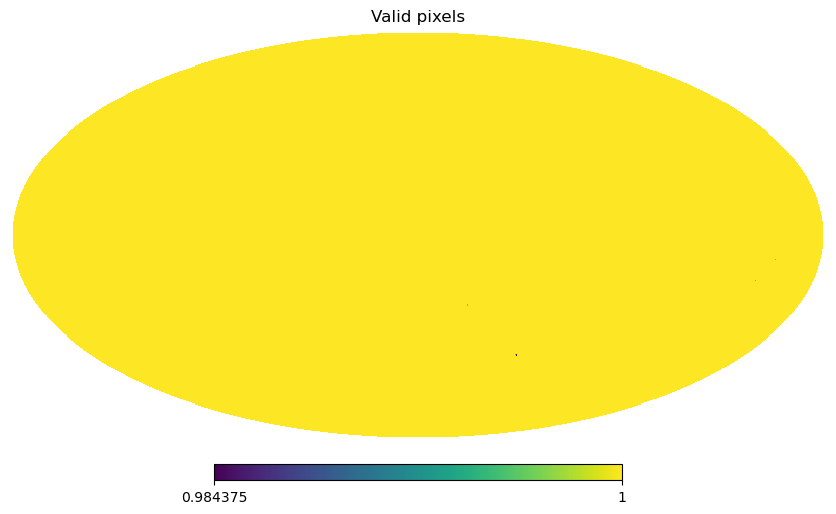

In [50]:
hp.mollview(valid_grade, title='Valid pixels')

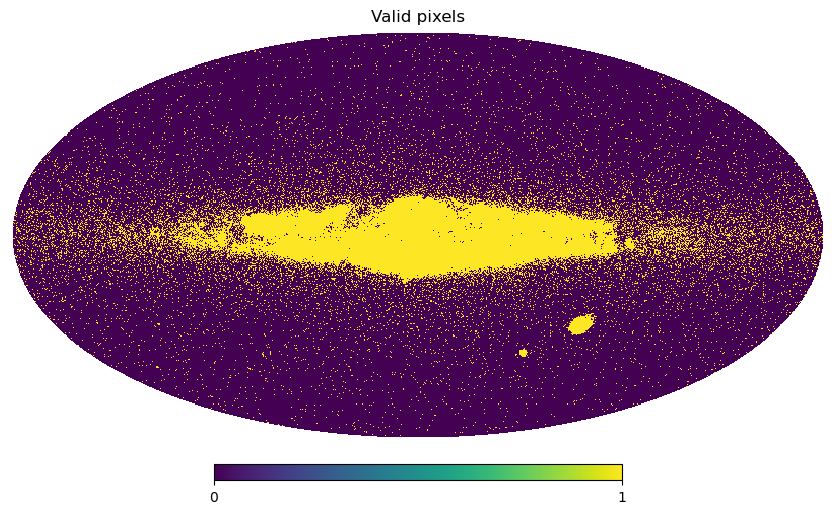

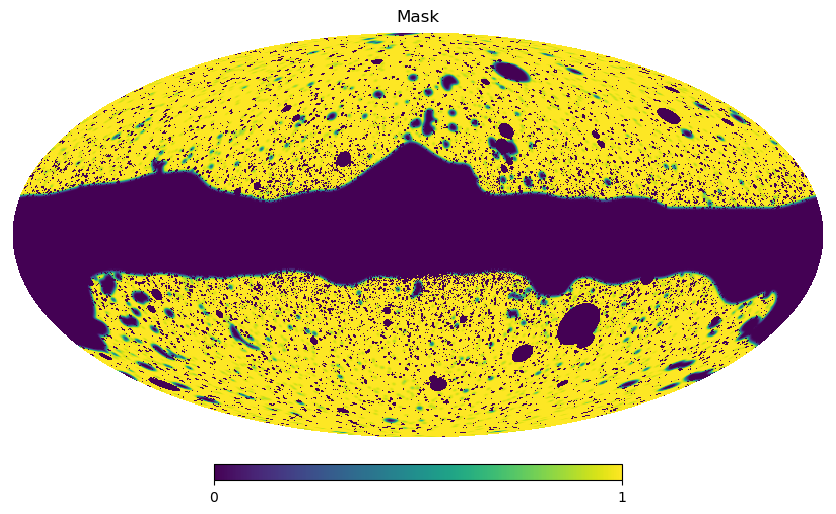

In [55]:
hp.mollview(valid, title='Valid pixels')
hp.mollview(mask, title='Mask')

In [56]:
act_codex = di.get_ymap_index_act()
for index in act_codex:
    print(index)

map object with cib 1.0 10.7
map object with cib 1.0 24.0
map object with cib 1.2 10.7
map object with cib 1.2 24.0
map object with cib 1.4 10.7
map object with cib 1.4 24.0
map object with cib 1.6 10.7
map object with cib 1.6 24.0
map object with cib 1.7 10.7
map object with cib 1.7 24.0
map object with cib 1.8 10.7
map object with cib 1.8 24.0
map object with cib 2.0 10.7
map object with cib 2.0 24.0
map object with cibdBeta 1.0 10.7
map object with cibdBeta 1.0 24.0
map object with cibdBeta 1.15 24.0
map object with cibdBeta 1.2 10.7
map object with cibdBeta 1.2 24.0
map object with cibdBeta 1.3 24.0
map object with cibdBeta 1.35 24.0
map object with cibdBeta 1.45 24.0
map object with cibdBeta 1.4 10.7
map object with cibdBeta 1.4 24.0
map object with cibdBeta 1.6 10.7
map object with cibdBeta 1.6 24.0
map object with cibdBeta 1.7 10.7
map object with cibdBeta 1.7 24.0
map object with cibdBeta 1.8 10.7
map object with cibdBeta 1.8 24.0
map object with cibdBeta 2.0 10.7
map object wi

In [ ]:
index = act_codex[0]
flat_act= index.read()

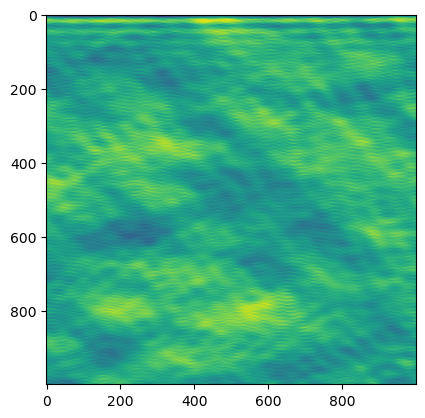

In [69]:
plt.imshow(flat_act[0][:1000,:1000])

In [70]:
healpix_map = index.generate_map(nside = 512)

Generating HEALPix map...


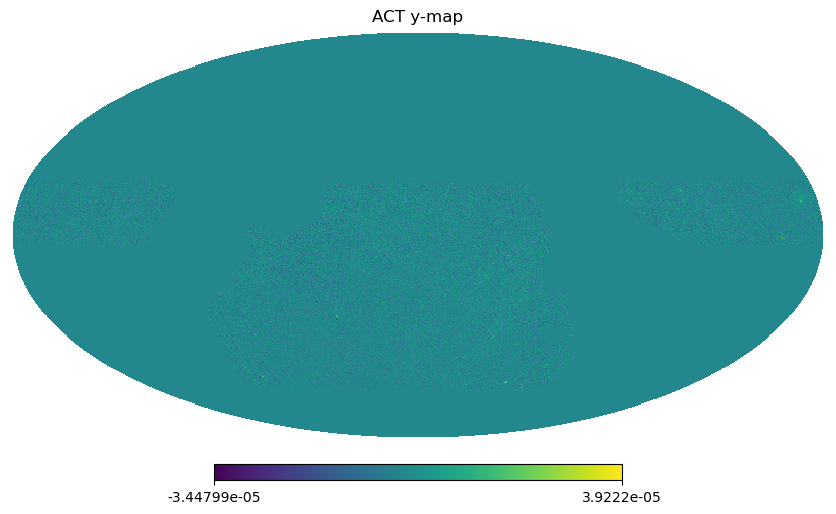

In [71]:
hp.mollview(healpix_map, title='ACT y-map')

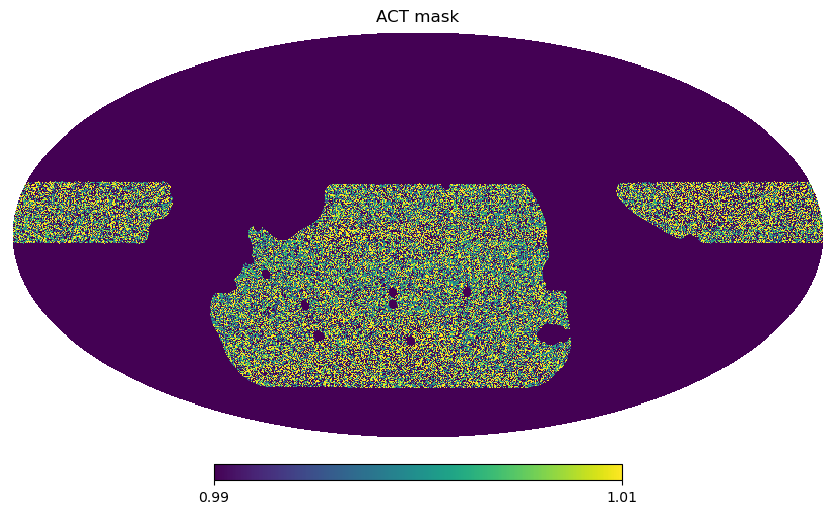

In [75]:
act_mask = di.read_composite_mask(apodize=False)
hp.mollview(act_mask, title='ACT mask', min=0.99, max=1.01)

In [77]:
## projection coords wromng

In [76]:
mask_over = (act_mask>1.0)
print(np.sum(mask_over))

7419775
